In [1]:
import tensorflow as tf
from keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pywt
import pywt.data
import soundfile as sf
import numpy as np
import librosa
from helper_code import *
import math
import os, numpy as np, scipy as sp, scipy.io, scipy.io.wavfile
import neurokit2 as nk
import tqdm

import os
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import librosa
import librosa.display
import math
import sys
#sys.path.insert(0,'/home/ikwak2/hmd/notebooks')
#sys.path.insert(0,'/home/ikwak2/hmd/iy_classifier')
sys.path.insert(0,'utils')
from helper_code import *
from get_feature import *
from models import *
from Generator0 import *
import pickle
from tensorflow.keras.layers import Convolution2D, GlobalAveragePooling2D, MaxPool2D, ZeroPadding2D,MaxPool1D,Conv1D
import os
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import librosa
import librosa.display
import math
import sys
#sys.path.insert(0,'/home/ikwak2/hmd/notebooks')
#sys.path.insert(0,'/home/ikwak2/hmd/iy_classifier')
sys.path.insert(0,'utils')
from helper_code import *
from get_feature import *
from models import *
from Generator0 import *
from keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [2]:
model_folder = 'lcnn2'

In [3]:
with open('/home/jk21/Downloads/Data/features_trn_rr_raw.pickle', 'rb') as f:
    features_trn = pickle.load(f)

In [4]:
with open('/home/jk21/Downloads/Data/features_test_rr_raw.pickle', 'rb') as f:
    features_test = pickle.load(f)

In [3]:
# data_folder =  'physionet.org/files/circor-heart-sound/1.0.3/training_data'
train_folder =  '/home/jk21/Downloads/Data/data/murmur/train'
test_folder = '/home/jk21/Downloads/Data/data/murmur/test'


In [4]:
patient_files_trn = find_patient_files(train_folder)

In [5]:
patient_files_trn

['/home/jk21/Downloads/Data/data/murmur/train/2530.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/9979.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/9983.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/13918.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/14241.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/14998.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/23625.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/24160.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/29045.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/29378.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/31737.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/36327.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/39043.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/39403.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/39456.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/40058.txt',
 '/home/jk21/Downloads/Data/data/murmur/train/40840.txt',
 '/home/jk21/Down

In [6]:
current_patient_data = load_patient_data(patient_files_trn[200])
num_locations = get_num_locations(current_patient_data)
recording_information = current_patient_data.split('\n')[1:num_locations+1]

In [7]:
recording_information

['AV 50284_AV.hea 50284_AV.wav 50284_AV.tsv',
 'PV 50284_PV.hea 50284_PV.wav 50284_PV.tsv',
 'TV 50284_TV.hea 50284_TV.wav 50284_TV.tsv',
 'MV 50284_MV.hea 50284_MV.wav 50284_MV.tsv']

In [8]:
data_folder = train_folder

In [9]:
entries = recording_information[3].split(' ')
recording_file = entries[2]
filename = os.path.join(data_folder, recording_file)

In [10]:
filename

'/home/jk21/Downloads/Data/data/murmur/train/50284_MV.wav'

In [11]:
afile = librosa.load(filename)[0]

In [12]:
widths = np.arange(1, 31)

In [13]:
wavlist = pywt.wavelist(kind='continuous')

In [14]:
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [142]:
cwtmatr, freqs=pywt.cwt(afile,13,'gaus2')

In [143]:
cwtmatr

array([[-0.03715572, -0.03198799, -0.02502273, ...,  0.0229891 ,
         0.02832278,  0.03252299]], dtype=float32)

In [120]:
cwtmatr.shape

(1, 680199)

In [121]:
cwtmatr[0][:4000]

array([-0.13443777, -0.14070342, -0.13744186, ..., -0.00675856,
       -0.00689578, -0.00703356], dtype=float32)

In [122]:
freqs.shape

(1,)

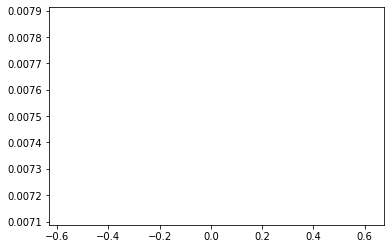

In [123]:
plt.plot(cwtmatr[:,4000:8000],freqs)
plt.show()

In [124]:
cwtmatr[0]

array([-0.13443777, -0.14070342, -0.13744186, ..., -0.02899176,
       -0.02653418, -0.02394494], dtype=float32)

In [125]:
pywt.central_frequency('gaus5')

0.5

In [126]:
feature_extract_melspec(cwtmatr[0])[0]

array([[  3.2235103,   0.8934503,   7.640271 , ...,  -0.6267582,
         -3.0133686,   1.0079122],
       [  3.7213726,   7.4741755,   8.478863 , ...,   5.415107 ,
          3.044069 ,   3.7729716],
       [  0.868631 ,   7.720468 ,  -1.533304 , ...,   2.4010668,
          2.2920256,  -1.3373618],
       ...,
       [-55.340763 , -55.340763 , -55.340763 , ..., -55.340763 ,
        -55.340763 , -55.340763 ],
       [-55.340763 , -55.340763 , -55.340763 , ..., -55.340763 ,
        -55.340763 , -55.340763 ],
       [-55.340763 , -55.340763 , -55.340763 , ..., -55.340763 ,
        -55.340763 , -55.340763 ]], dtype=float32)

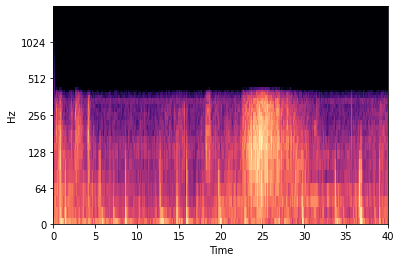

In [144]:
librosa.display.specshow(feature_extract_melspec(afile)[0], sr=4000, x_axis='time', y_axis='log')

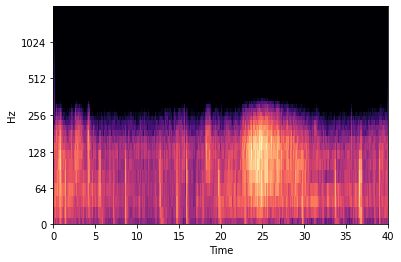

In [145]:
librosa.display.specshow(feature_extract_melspec(cwtmatr[0])[0], sr=4000, x_axis='time', y_axis='log')

In [100]:
coeffs2 = pywt.dwt2(feature_extract_melspec(afile)[0], 'bior1.3')

In [104]:
LL, (LH, HL, HH) = coeffs2

In [105]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

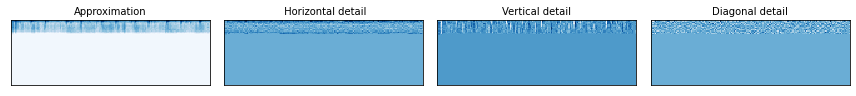

In [111]:
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.Blues)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()